In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

In [ ]:
def balance_at_month(prinicipal_loan_amount,interest_rate,month,monthly_payment):
    P=prinicipal_loan_amount
    R=interest_rate
    m=month
    M=monthly_payment
    BR=(P*(1+R)**(m))+M*(1-(1+R)**m)/R
    return BR

In [ ]:
def interest_principal_paid_at_month(principal_loan_amount,interest_rate,month,monthly_payment):
    IP=balance_at_month(principal_loan_amount,interest_rate,month-1,monthly_payment)*interest_rate
    P=monthly_payment-IP
    return IP,P

In [51]:
def tot_interest_principal_paid(principal_loan_amount,interest_rate,month,monthly_payment):
    x=np.arange(1,month+1)
    TOT_INTEREST=interest_principal_paid_at_month(principal_loan_amount,interest_rate,x,monthly_payment)[0].sum()
    TOT_PRINCIPAL=interest_principal_paid_at_month(principal_loan_amount,interest_rate,x,monthly_payment)[1].sum()
    return TOT_INTEREST, TOT_PRINCIPAL

In [126]:
def mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,year):
    P=home_price-down_payment #Principal loan amount
    R=interest_rate/100/12 #Monthly interest rate
    T=term_of_loan_years*12 #Term of loan in months
    
    #Numerator of monthly repayment formula
    M_n=R*P*((1+R)**T)
    
    #Denominator of monthly repayment formula
    M_d=(1+R)**T-1
    
    M=M_n/M_d #Monthly repayments
    
    TI=M*T-P #Total interest paid over term of loan

    ##Outputs as a function of years##

    #Balance Remaining
    BR=balance_at_month(P,R,year*12,M)


    #Interest paid at year

    Interest, Principal = tot_interest_principal_paid(P,R,year*12,M)


    #Yearly total interest paid
    #Yearly principal paid
    
    return M, TI, BR, Interest, Principal 

In [129]:
mortgage_calc(3.25,20,300000,40000,1)

(1474.7089798853074,
 93930.15517247375,
 250614.50675685954,
 8311.014515483152,
 9385.493243140536)

In [151]:
def amoritization_table(interest_rate,term_of_loan_years,home_price,down_payment):
    p_interest=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[3]
    p_principal=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[4]
    p_balance=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[2]
    M=mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,1)[0]
    TI=mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,1)[1]
    x_interest=[]
    x_principal=[]
    x_balance=[]
    for x in np.arange(1,21):
        x_interest_new=p_interest(x)
        x_interest.append(x_interest_new)
        x_principal_new=p_principal(x)
        x_principal.append(x_principal_new)
        x_balance_new=p_balance(x)
        x_balance.append(x_balance_new)
    py.plot(np.arange(1,21),x_interest)
    py.plot(np.arange(1,21),x_principal,'r')
    py.plot(np.arange(1,21),x_balance,'g')
    at=pd.DataFrame({'balance':x_balance,'total_interest_paid':x_interest,'total_principal_paid':x_principal},index={'payment periods':np.arange(1,21)})
    print(at)

In [144]:
x_balance

[250614.50675685954,
 240919.4000590195,
 230904.46621937293,
 220559.15461647479,
 209872.5665795803,
 198833.44390701578,
 187430.15700578882,
 175650.69263994115,
 163482.6412747384,
 150913.18400336275,
 137929.07904233754,
 124516.64778145566,
 110661.76037351554,
 96349.82084868412,
 81565.75173780537,
 66293.97818845388,
 50518.411557000945,
 34222.43245940743,
 17388.873262888053,
 0.0]

In [152]:
amoritization_table(3.25,20,300000,40000)

ValueError: Shape of passed values is (20, 3), indices imply (1, 3)

In [104]:
p_interest=lambda x: mortgage_calc(3.25,20,300000,40000,x)[3]
p_principal=lambda x: mortgage_calc(3.25,20,300000,40000,x)[4]
p_balance=lambda x: mortgage_calc(3.25,20,300000,40000,x)[2]

In [112]:
x_interest=[]
x_principal=[]
x_balance=[]
for x in np.arange(1,21):
    x_interest_new=p_interest(x)
    x_interest.append(x_interest_new)
    x_principal_new=p_principal(x)
    x_principal.append(x_principal_new)
    x_balance_new=p_balance(x)
    x_balance.append(x_balance_new)

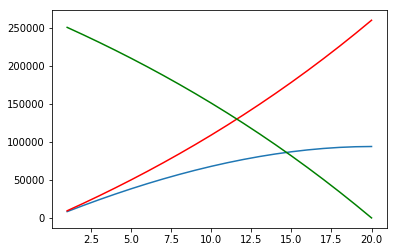

In [118]:
py.plot(np.arange(1,21),x_interest)
py.plot(np.arange(1,21),x_principal,'r')
py.plot(np.arange(1,21),x_balance,'g')